In [1]:
import numpy as np
from joblib import Parallel, delayed
from stasis_jax import Simulator
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm

In [2]:
from joblib import Parallel, delayed
import numpy as np
import pandas as pd

# Define the function to run a single simulation
def run_simulation(N, Gamma0, alpha=2/7, gamma=1):
    ls = np.linspace(1, N, N)
    Gamma = Gamma0 * np.exp(gamma * (ls - N))
    Omegas = np.exp(alpha * (ls - N))
    sim = Simulator(Omega_0=Omegas, Gamma_0=Gamma)
    stasis_val, abundance_val = sim.return_stasis()
    return {'N': N, 'Gamma0': Gamma0, 'stasis_val': stasis_val, 'abundance_val': abundance_val}

# Parameters
N_list = [5, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300, 350, 400]
Gamma0_vals = [1e-2, 1e-1, 1, 10, 100]

# Run simulations in parallel
results = Parallel(n_jobs=-1)(delayed(run_simulation)(N, Gamma0) for N in tqdm(N_list) for Gamma0 in tqdm(Gamma0_vals))

# Convert results to a DataFrame
df = pd.DataFrame(results)

# Display the DataFrame
# import ace_tools as tools; tools.display_dataframe_to_user(name="Simulation Results", dataframe=df)


100%|██████████| 5/5 [00:00<00:00, 29789.09it/s]


100%|██████████| 5/5 [00:00<00:00, 48099.82it/s]
/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.Dynam

KeyboardInterrupt: 

In [51]:
stasis_vals_3, stasis_vals_5, stasis_vals_7 = [], [], []

for N in N_list:
    sim = Simulator(alpha = 1, gamma = 3, delta = 1, N=N)
    s, a = sim.return_stasis()
    # sim.plot_abundance()
    stasis_vals_3.append(s)

    sim = Simulator(alpha = 1, gamma = 5, delta = 1, N=N)
    s, a = sim.return_stasis()
    # sim.plot_abundance()
    stasis_vals_5.append(s)

    sim = Simulator(alpha = 1, gamma = 7, delta = 1, N=N)
    s, a = sim.return_stasis()
    # sim.plot_abundance()
    stasis_vals_7.append(s)

/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will

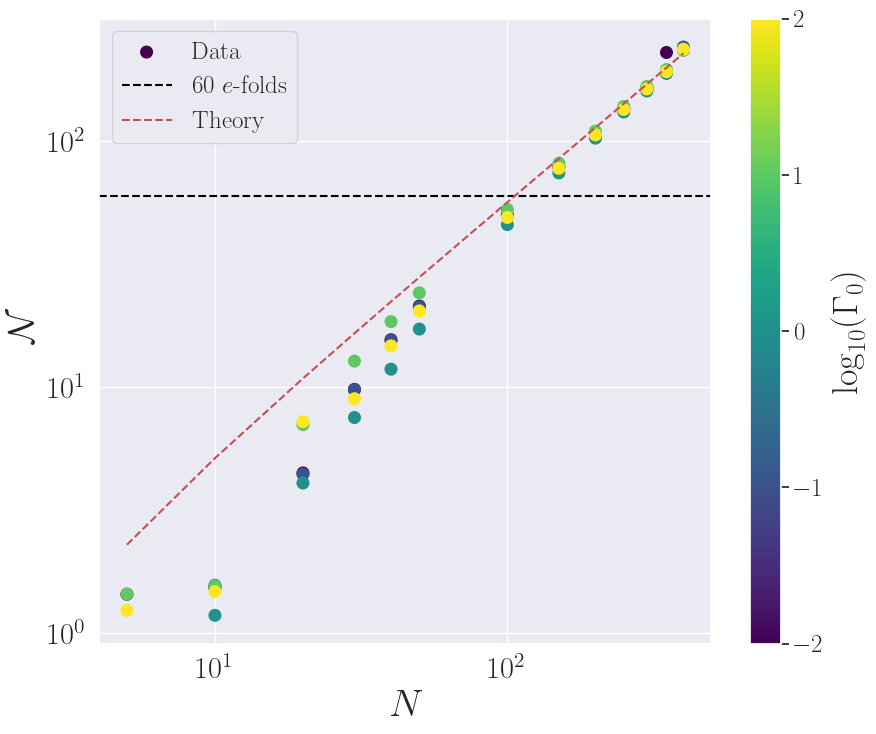

In [152]:
sns.set_style('darkgrid')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

def stasis_theory(N, omega_m_bar = 0.5, gamma = 1):
    ans = (2 / (4 - omega_m_bar)) * gamma * (N-1)
    return ans

theory_vals = [stasis_theory(N) for N in N_list]
# Create scatter plot
plt.figure(figsize=(9, 7.5))
sc = plt.scatter(df['N'], df['stasis_val'], c=np.log10(df['Gamma0']), cmap='viridis', label='Data', s=70)
plt.axhline(y=60, color='black', linestyle='--', label=r'60 $e$-folds')
plt.plot(N_list, theory_vals, 'r--', label='Theory')

# Add colorbar
cbar = plt.colorbar(sc)
### set ticks 
cbar.set_ticks(np.log10(Gamma0_vals))
cbar.set_label(r'$\log_{10}(\Gamma_0)$', fontsize=26)
## larger font size
cbar.ax.tick_params(labelsize=18)
# Add labels and title
plt.xlabel(r'$N$', fontsize=28)
plt.ylabel(r'$\mathcal{N}$', fontsize=26)
# plt.title('Exponential Model of Stasis')
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=18)
plt.tight_layout()
# Show plot
# plt.show()
plt.savefig('/Users/snehpandya/Projects/stasis/paper_plot_data/exponential_model_plots/exponential_model_stasis.png', dpi=300)

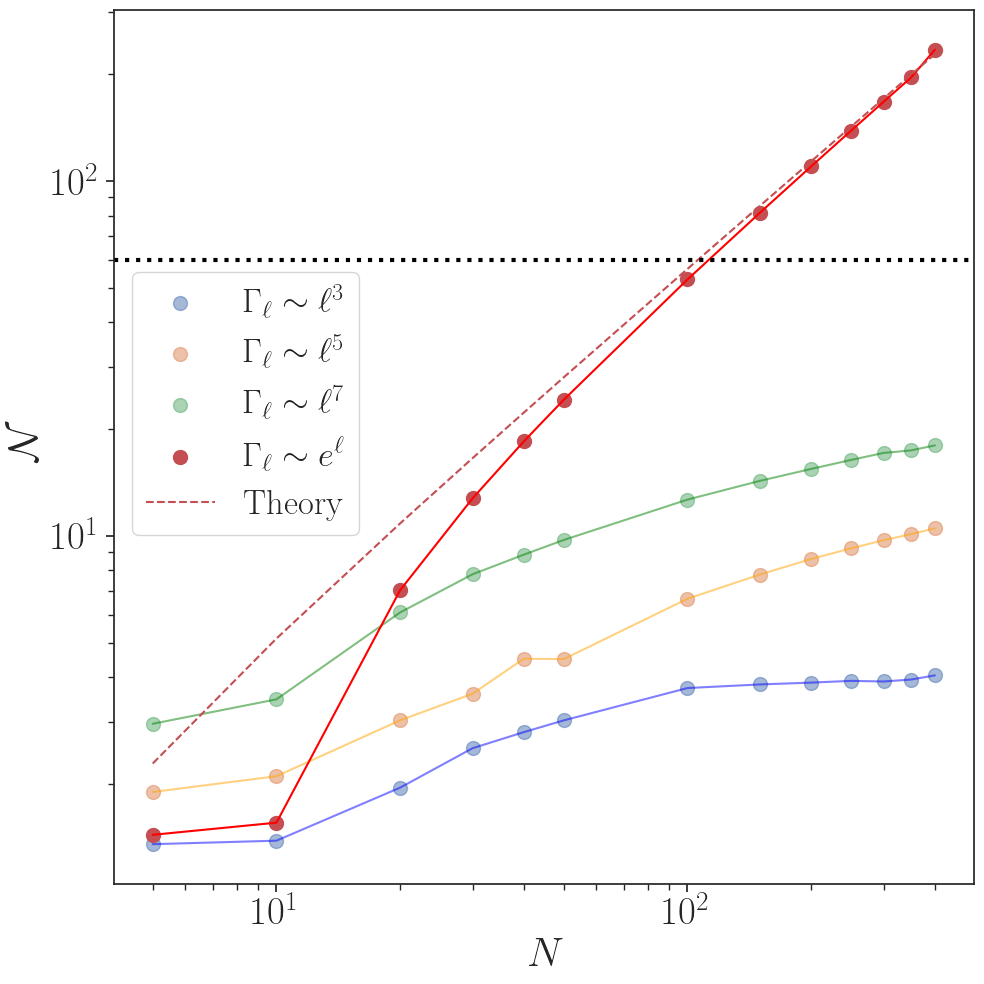

In [212]:
import seaborn as sns

# Set seaborn style
sns.set_style('ticks')
plt.figure(figsize=(10, 10))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

# Converts all the stasis_val_arrays to float 
stasis_vals_3 = np.array(stasis_vals_3).astype(float)
stasis_vals_5 = np.array(stasis_vals_5).astype(float)
stasis_vals_7 = np.array(stasis_vals_7).astype(float)
### isolate stasis_val for all N and for Gamma0 = .01
stasis_vals= np.array(df[df['Gamma0'] == 10]['stasis_val']).astype(float)



# Plot stasis vals
plt.scatter(N_list, stasis_vals_3, label='$\Gamma_\ell \sim \ell^3$', s = 100, alpha=0.5)
plt.plot(N_list, stasis_vals_3, color='blue', alpha = 0.5) #, label='Theory
plt.scatter(N_list, stasis_vals_5, label='$\Gamma_\ell \sim \ell^5$', s = 100, alpha=0.5)
plt.plot(N_list, stasis_vals_5, color='orange', alpha=0.5) #, label='Theory
plt.scatter(N_list, stasis_vals_7, label='$\Gamma_\ell \sim \ell^7$', s = 100, alpha=0.5)
plt.plot(N_list, stasis_vals_7, color='green', alpha=0.5) #, label='Theory
plt.scatter(N_list, stasis_vals, label='$\Gamma_\ell \sim e^{\ell}$', s = 100)
plt.plot(N_list, stasis_vals, color='red')#, label='Theory
plt.plot(N_list, theory_vals, 'r--', label='Theory')
plt.axhline(y=60, color='black', linestyle='dotted', lw=3)

# plt.title("Stasis e-folds vs. Number of Species")
plt.xlabel("$N$", fontsize=30)
plt.xticks(fontsize=28)
plt.ylabel("$\mathcal{N}$", fontsize=30)
plt.yticks(fontsize=28)

plt.xscale('log')
plt.yscale('log')

# Add legend
## have legend by horizontal
## specify location by point
plt.legend(fontsize=25, loc = 'center left', bbox_to_anchor=(.001, 0.55))
plt.tight_layout()

# plt.savefig('plots_jim/efolds_vs_species.png', dpi=300)

# Display the plot
# plt.show()
plt.savefig('/Users/snehpandya/Projects/stasis/paper_plot_data/exponential_model_plots/efolds_vs_species.png', dpi=300, bbox_inches='tight')

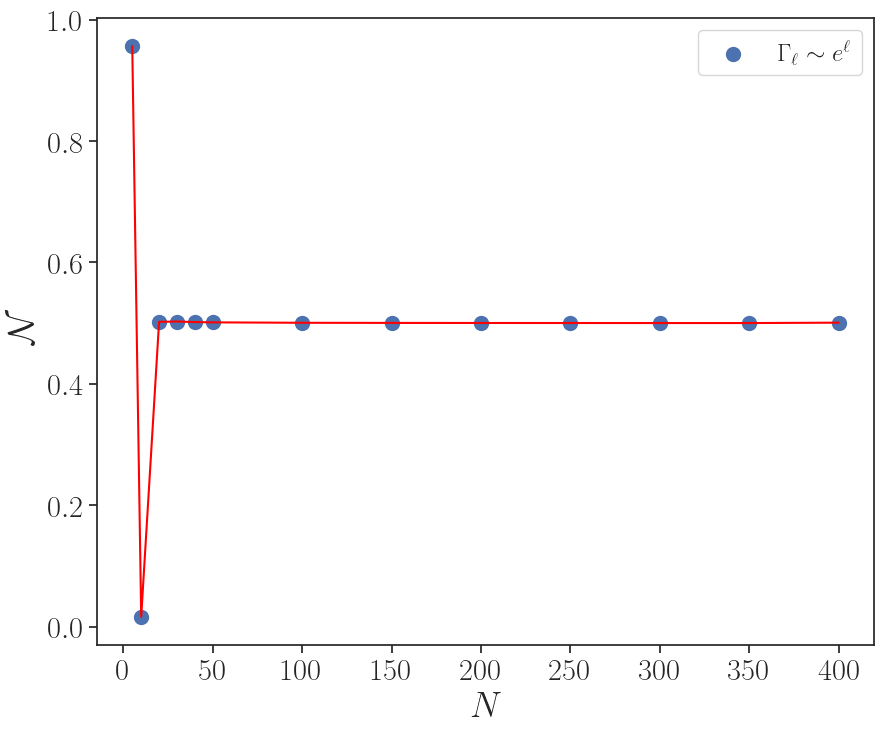

In [185]:
import seaborn as sns

# Set seaborn style
sns.set_style('ticks')
plt.figure(figsize=(9, 7.5))
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

# Converts all the stasis_val_arrays to float 
stasis_vals_3 = np.array(stasis_vals_3).astype(float)
stasis_vals_5 = np.array(stasis_vals_5).astype(float)
stasis_vals_7 = np.array(stasis_vals_7).astype(float)
### isolate stasis_val for all N and for Gamma0 = .01
stasis_vals = np.array(df[df['Gamma0'] == .01]['abundance_val']).astype(float)



# Plot stasis val
plt.scatter(N_list, stasis_vals, label='$\Gamma_\ell \sim e^{\ell}$', s = 100)
plt.plot(N_list, stasis_vals, color='red')#, label='Theory
# plt.plot(N_list, theory_vals, 'r--', label='Theory')
# plt.axhline(y=60, color='black', linestyle='dotted')

# plt.title("Stasis e-folds vs. Number of Species")
plt.xlabel("$N$", fontsize=26)
plt.xticks(fontsize=22)
plt.ylabel("$\mathcal{N}$", fontsize=26)
plt.yticks(fontsize=22)

# plt.xscale('log')
# plt.yscale('log')

# Add legend
## have legend by horizontal
plt.legend(fontsize=18)
plt.tight_layout()

# plt.savefig('plots_jim/efolds_vs_species.png', dpi=300)

# Display the plot
# plt.show()
# plt.savefig('/Users/snehpandya/Projects/stasis/paper_plot_data/exponential_model_plots/efolds_vs_species.png', dpi=300, bbox_inches='tight')

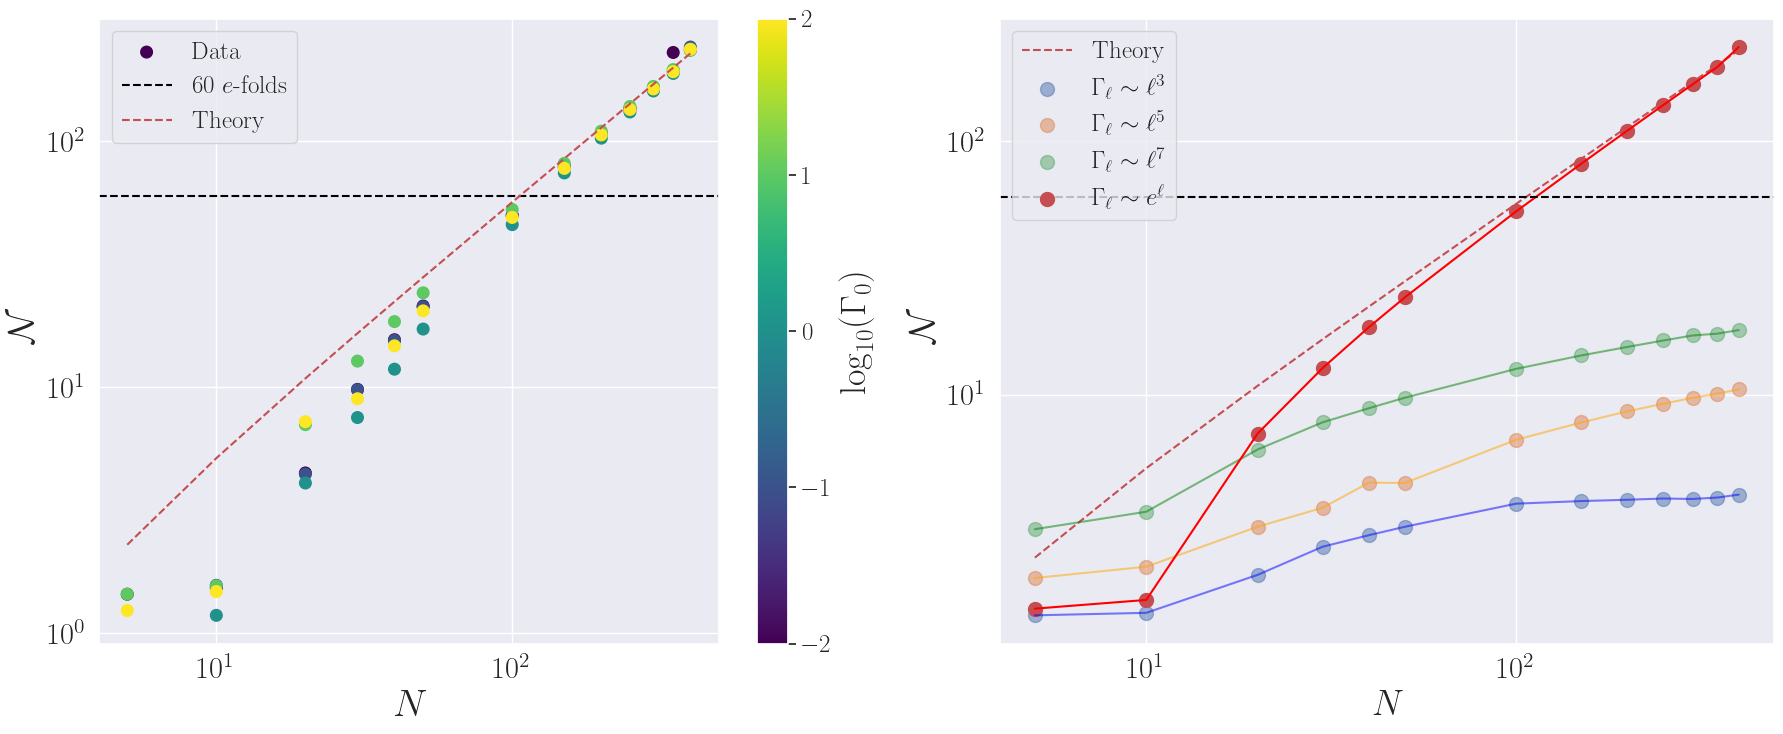

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style and LaTeX settings
sns.set_style('darkgrid')
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

# Define stasis_theory function
def stasis_theory(N, omega_m_bar=0.5, gamma=1):
    ans = (2 / (4 - omega_m_bar)) * gamma * (N - 1)
    return ans

# Assuming df, N_list, stasis_vals_3, stasis_vals_5, stasis_vals_7, Gamma0_vals are defined
# Add your data here
# df = ...
# N_list = ...
# stasis_vals_3 = ...
# stasis_vals_5 = ...
# stasis_vals_7 = ...
# Gamma0_vals = ...

theory_vals = [stasis_theory(N) for N in N_list]

# Create figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7.5))

# First subplot
sc = ax1.scatter(df['N'], df['stasis_val'], c=np.log10(df['Gamma0']), cmap='viridis', label='Data', s=70)
ax1.axhline(y=60, color='black', linestyle='--', label=r'60 $e$-folds')
ax1.plot(N_list, theory_vals, 'r--', label='Theory')

# Add colorbar to first subplot
cbar = plt.colorbar(sc, ax=ax1)
cbar.set_ticks(np.log10(Gamma0_vals))
cbar.set_label(r'$\log_{10}(\Gamma_0)$', fontsize=26)
cbar.ax.tick_params(labelsize=18)

# Add labels and title to first subplot
ax1.set_xlabel(r'$N$', fontsize=28)
ax1.set_ylabel(r'$\mathcal{N}$', fontsize=26)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.legend(fontsize=18)
ax1.tick_params(axis='both', which='major', labelsize=22)
ax2.plot(N_list, theory_vals, 'r--', label='Theory')

# ax1.set_title("Exponential Model of Stasis", fontsize=22)

# Second subplot
stasis_vals = np.array(df[df['Gamma0'] == 10]['stasis_val']).astype(float)

ax2.scatter(N_list, stasis_vals_3, label='$\Gamma_\ell \sim \ell^3$', s=100, alpha=0.5)
ax2.plot(N_list, stasis_vals_3, color='blue', alpha=0.5)
ax2.scatter(N_list, stasis_vals_5, label='$\Gamma_\ell \sim \ell^5$', s=100, alpha=0.5)
ax2.plot(N_list, stasis_vals_5, color='orange', alpha=0.5)
ax2.scatter(N_list, stasis_vals_7, label='$\Gamma_\ell \sim \ell^7$', s=100, alpha=0.5)
ax2.plot(N_list, stasis_vals_7, color='green', alpha=0.5)
ax2.scatter(N_list, stasis_vals, label='$\Gamma_\ell \sim e^{\ell}$', s=100)
ax2.plot(N_list, stasis_vals, color='red')
ax2.set_xscale('log')

ax2.axhline(y=60, color='black', linestyle='--')

# Add labels and title to second subplot
ax2.set_xlabel("$N$", fontsize=26)
ax2.set_ylabel("$\mathcal{N}$", fontsize=26)
ax2.set_yscale('log')
ax2.legend(fontsize=18, loc='upper left')
ax2.tick_params(axis='both', which='major', labelsize=22)
# ax2.set_title("Stasis e-folds vs. Number of Species", fontsize=22)

# Adjust layout
plt.tight_layout()

# Save the combined figure
# plt.savefig('/Users/snehpandya/Projects/stasis/paper_plot_data/exponential_model_plots/combined_stasis_plots.png', dpi=300)

# Show plot
plt.show()


/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will lead to an error in a future JAX release.
  warnings.warn(
/Users/snehpandya/venv-ml/lib/python3.9/site-packages/jax/_src/core.py:678: FutureWarning: unhashable type: <class 'jax._src.interpreters.partial_eval.DynamicJaxprTracer'>. Attempting to hash a tracer will

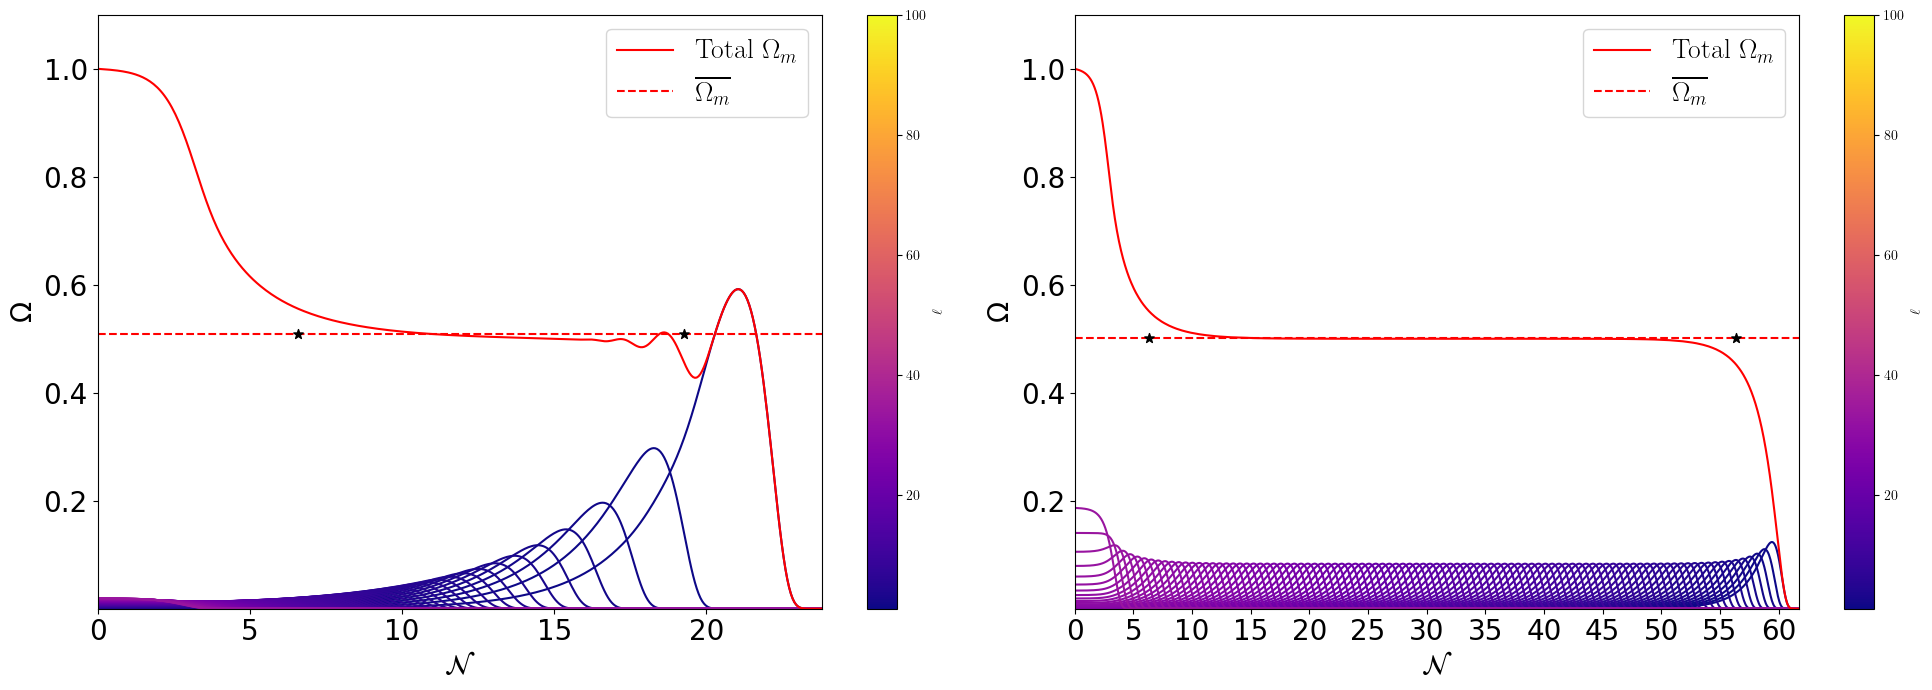

In [2]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern"],
    "text.latex.preamble": r"\usepackage{amsmath}"
})

N = 100
gamma = 1
alpha = (2/7)
ls = np.linspace(1, N, N)
Gamma = .01 * np.e**(gamma * (ls - N))
Omegas = np.e**(alpha * (ls - N))


sim = Simulator(alpha=1, gamma=7, delta=1, N=N)
sim.return_stasis()
cbar1 = sim.plot_abundance(ax=axs[0])
sim2 = Simulator(Omega_0=Omegas, Gamma_0=Gamma)
cbar2 = sim2.return_stasis()
sim2.plot_abundance(ax=axs[1])

### remove titles

axs[0].set_title('')
axs[1].set_title('')

### increase label size

axs[0].set_xlabel(r'$\mathcal{N}$', fontsize=20)
axs[0].set_ylabel(r'$\Omega$', fontsize=20)
axs[1].set_xlabel(r'$\mathcal{N}$', fontsize=20)
axs[1].set_ylabel(r'$\Omega$', fontsize=20)

## increase legend size

axs[0].legend(fontsize=20)
axs[1].legend(fontsize=20)

## increase ticks sizes

axs[0].tick_params(axis='both', which='major', labelsize=20)
axs[1].tick_params(axis='both', which='major', labelsize=20)

### increase colorbar ticks 
# cbar1.ax.tick_params(labelsize=20)
# cbar2.ax.tick_params(labelsize=20)
# sim.cbar.ax.tick_params(labelsize=20)


plt.tight_layout()
# plt.savefig('/Users/snehpandya/Projects/stasis/paper_plot_data/exponential_model_plots/modelcomparisons.png', dpi=300, bbox_inches='tight')